In [1]:
import numpy as np
from IPython.display import SVG

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import theano as th
import theano.tensor as tht
import theano.printing as thp
import theano.d3printing as d3p

Couldn't import dot_parser, loading of dot files will not be possible.


# Example 1

In [169]:
x, y, z = tht.scalars('xyz')
e = x + y * z
o = th.OpFromGraph([x, y, z], [e])
e2 = o(x, y, z) + o(z, y, y)
f = th.function([x, y, z], [e2])

In [170]:
gf = d3p.GraphFormatter()
g = gf.to_pydot(f)

In [171]:
g.write_dot('opfrom.dot')

True

In [168]:
#SVG(g.create_svg())

In [162]:
print(g.create_dot())

digraph G {
	graph [bb="0,0,2604,316"];
	node [label="\N"];
	subgraph cluster_n1 {
		graph [bb="1158,80,1873,308"];
		n11		 [fillcolor="#FFAABB",
			height=0.5,
			label="Elemwise{Composite{(i0 + (i1 * i2))}}",
			pos="1508,194",
			shape=ellipse,
			style=filled,
			type=colored,
			width=4.3102];
		n15		 [fillcolor=dodgerblue,
			height=0.5,
			label="TensorType(float32, scalar)",
			pos="1508,106",
			shape=box,
			style=filled,
			width=2.3889];
		n11 -> n15		 [label="TensorType(float32, scalar)",
			lp="1586,150",
			pos="e,1508,124.08 1508,175.6 1508,163.75 1508,147.82 1508,134.29"];
		n12		 [fillcolor=limegreen,
			height=0.5,
			label="name=x TensorType(float32, scalar)",
			pos="1754,282",
			shape=box,
			style=filled,
			width=3.0625];
		n12 -> n11		 [label="0 TensorType(float32, scalar)",
			lp="1789.5,238",
			pos="e,1602.7,208.31 1732.7,263.92 1717.7,252.69 1696.6,238.53 1676,230 1656.1,221.75 1634,215.37 1612.5,210.46"];
		n13		 [fillcolor=limegreen,
			height=0.5,
			la

In [110]:
topo = f.maker.fgraph.toposort()
topo

[<theano.compile.builders.OpFromGraph object at 0x10c9dadd0>(z, y, y),
 <theano.compile.builders.OpFromGraph object at 0x10c9dadd0>(x, y, z),
 Elemwise{Add}[(0, 0)](<theano.compile.builders.OpFromGraph object at 0x10c9dadd0>.0, <theano.compile.builders.OpFromGraph object at 0x10c9dadd0>.0)]

In [146]:
a = ['1', '2']
b = ['11', '22']
m = zip(a, b)
m = [list(x) for x in m]

In [147]:
m

[['1', '11'], ['2', '22']]

In [111]:
op = topo[0]

In [118]:
out = f.maker.fgraph.outputs[0]
out

Elemwise{Add}[(0, 0)].0

In [122]:
op.op.fn.maker.fgraph.outputs[0].type

TensorType(float32, scalar)

In [119]:
out.type

TensorType(float32, scalar)

In [91]:
op.op.fn.outputs[0]

Out(Elemwise{add,no_inplace}.0,False)

In [92]:
f.outputs

[Out(Elemwise{add,no_inplace}.0,False)]

In [95]:
f.outputs

[Out(Elemwise{add,no_inplace}.0,False)]

In [94]:
f.maker.fgraph.outputs

[Elemwise{Add}[(0, 0)].0]

In [76]:
op.outputs

[<theano.compile.builders.OpFromGraph object at 0x10c782f90>.0]

In [69]:
gf.node_id(op1.outputs[0])

'n10'

In [70]:
print(g.create_dot())

digraph G {
	graph [bb="0,0,2605,316"];
	node [label="\N"];
	subgraph cluster_n1 {
		graph [bb="1159,80,1874,308"];
		n11		 [fillcolor="#FFAABB",
			height=0.5,
			label="Elemwise{Composite{(i0 + (i1 * i2))}}",
			pos="1509,194",
			shape=ellipse,
			style=filled,
			type=colored,
			width=4.3102];
		n15		 [fillcolor=dodgerblue,
			height=0.5,
			label="TensorType(float32, scalar)",
			pos="1509,106",
			shape=box,
			style=filled,
			width=2.3889];
		n11 -> n15		 [label="TensorType(float32, scalar)",
			lp="1587,150",
			pos="e,1509,124.08 1509,175.6 1509,163.75 1509,147.82 1509,134.29"];
		n12		 [fillcolor=limegreen,
			height=0.5,
			label="name=x TensorType(float32, scalar)",
			pos="1755,282",
			shape=box,
			style=filled,
			width=3.0625];
		n12 -> n11		 [label="0 TensorType(float32, scalar)",
			lp="1790.5,238",
			pos="e,1603.7,208.31 1733.7,263.92 1718.7,252.69 1697.6,238.53 1677,230 1657.1,221.75 1635,215.37 1613.5,210.46"];
		n13		 [fillcolor=limegreen,
			height=0.5,
			la

In [24]:
op1.inputs[0] is inputs[2]

True

In [27]:
op1.inputs[1] is inputs[1]

True

In [29]:
op1.inputs[2] is inputs[1]

True

In [31]:
op1.outputs

[<theano.compile.builders.OpFromGraph object at 0x10c1ed0d0>.0]

In [ ]:
ofg.fgraph

In [17]:
type(topo[0])

theano.gof.graph.Apply

In [18]:
type(topo[2].inputs[0])

theano.tensor.var.TensorVariable

In [34]:
topo[2].outputs[0].owner is topo[2]

True

In [32]:
type(o.owner)

theano.gof.graph.Apply

In [19]:
i = topo[2].inputs[0]

In [25]:
type(i.owner)

theano.gof.graph.Apply

In [15]:
topo[2].inputs[0]

<theano.compile.builders.OpFromGraph object at 0x112c970d0>.0

In [44]:
fg.outputs

[Elemwise{Add}[(0, 0)].0]

In [45]:
fg.inputs

[x, y, z]

In [47]:
fg.inputs[0].name

'x'

In [68]:
x = tht.scalar()
y = tht.scalar()
z = x + y
f = th.function([x, y], z)

In [69]:
fg = f.maker.fgraph

In [54]:
fg.inputs[0] is fg.inputs[1]

False

In [70]:
t = fg.toposort()

In [74]:
a, b = t[0].inputs

In [76]:
b.owner

In [63]:
h = fg.inputs[0]

In [67]:
h.__

AttributeError: 'TensorVariable' object has no attribute '__'

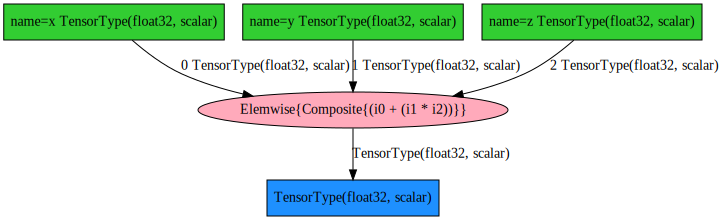

In [14]:
g = gf.to_pydot(topo[0].op.fn)
SVG(g.create_svg())

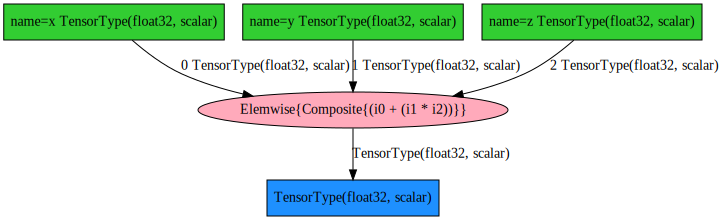

In [15]:
g = gf.to_pydot(topo[1].op.fn)
SVG(g.create_svg())

In [24]:
topo[0].inputs

[z, y, y]

In [25]:
topo[1].inputs

[x, y, z]

In [7]:
fo = of.op.fn

In [9]:
fo.maker.fgraph.toposort()

[Elemwise{Composite{(i0 + (i1 * i2))}}(x, y, z)]

In [47]:
gf = d3p.GraphFormatter()
g = gf.to_pydot(fo)

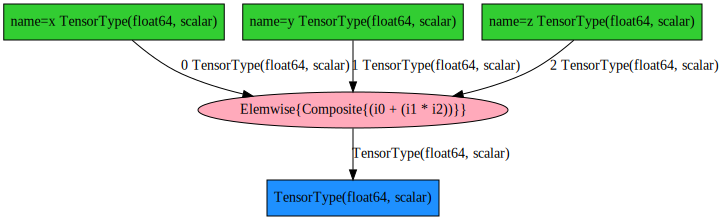

In [48]:
SVG(g.create_svg())

# Example 2 

In [4]:
x, y, z = tht.scalars('xyz')
e = x * y
o = th.OpFromGraph([x, y], [e])
e2 = o(x, y) + z
o2 = th.OpFromGraph([x, y, z], [e2])
e3 = o2(x, y, z) + z
f = th.function([x, y, z], [e3])

In [11]:
topo = f.maker.fgraph.toposort()

In [14]:
of = topo[0]

In [29]:
ofo = of.op

In [32]:
gf = d3p.GraphFormatter()

In [33]:
g = gf.to_pydot(ofo.fn.maker.fgraph)

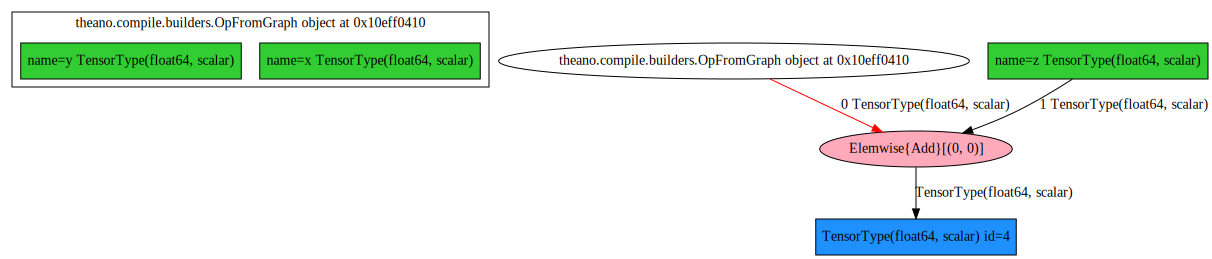

In [34]:
SVG(g.create_svg())